# EKG 

## In this notebook I will plot images from different classes. I will also plot 3 different channels of a one image

In [2]:
# Import packages

# for numerical analysis
import numpy as np # linear algebra

# to store and process in a dataframe
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizations, for ploting graphs
import matplotlib.pyplot as plt

# image processing
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# advancec ploting
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Image manipulations
from PIL import Image

# Timing utility
from timeit import default_timer as timer

from IPython.core.interactiveshell import InteractiveShell

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# Import PyTorch packages 

import torchvision
from torchvision import transforms, datasets, models

import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d


In [5]:
# file operations

import shutil
import os
from os import walk

# to list files
import glob

In [6]:
# current working directory

base_dir = os.getcwd()
base_dir

'/Users/Murat/Desktop/ECG_Project'

In [7]:
ls

EKG.ipynb                   MITBIH_img/
EKG_EDA.ipynb               data/
EKG_split_test_train.ipynb  plots/


In [8]:
data_dir =  os.path.join(base_dir, "MITBIH_img")
data_dir

'/Users/Murat/Desktop/ECG_Project/MITBIH_img'

. F (Fusion beat) - 801 images

. N (Normal beat) - 90,589 images

. Q (Unknown beat) - 8,038 images

. S (Supraventricular ectopic beat) - 2,779 images

. V (Ventricular ectopic beat) - 7,236 images

In [9]:
# no. of files

def list_files(startpath):
    
    for root, dirs, files in os.walk(startpath):
        
        level = root.replace(startpath, '').count(os.sep)
        
        indent = ' ' * 4 * (level)
        
        print('{}{}'.format(indent, os.path.basename(root)), '-', len(os.listdir(root)))
        
folder = data_dir
list_files(folder)

MITBIH_img - 5
    N - 90589
    S - 2779
    F - 803
    V - 7236
    Q - 8038


In [10]:
# Classes in the data

ECG_list = os.listdir(data_dir)

n_classes = len(ECG_list)

print(f'There are {n_classes} different classes.')

print(ECG_list)

There are 5 different classes.
['N', 'S', 'F', 'V', 'Q']


In [11]:
N_imgs = os.listdir('../ECG_Project/MITBIH_img/N')
print('# of Normal beat images: ',len(N_imgs))

F_imgs = os.listdir('../ECG_Project/MITBIH_img/F')
print('# of Fusion beat images: ',len(F_imgs))

Q_imgs = os.listdir('../ECG_Project/MITBIH_img/Q')
print('# of Unknown beat images: ',len(Q_imgs))

V_imgs = os.listdir('../ECG_Project/MITBIH_img/V')
print('# of Ventricular ectopic beat images: ',len(V_imgs))

S_imgs = os.listdir('../ECG_Project/MITBIH_img/S')
print('# of Supraventricular ectopic beat images: ',len(S_imgs))

# of Normal beat images:  90589
# of Fusion beat images:  803
# of Unknown beat images:  8038
# of Ventricular ectopic beat images:  7236
# of Supraventricular ectopic beat images:  2779


In [12]:
print(N_imgs[0])

fig_72633.png


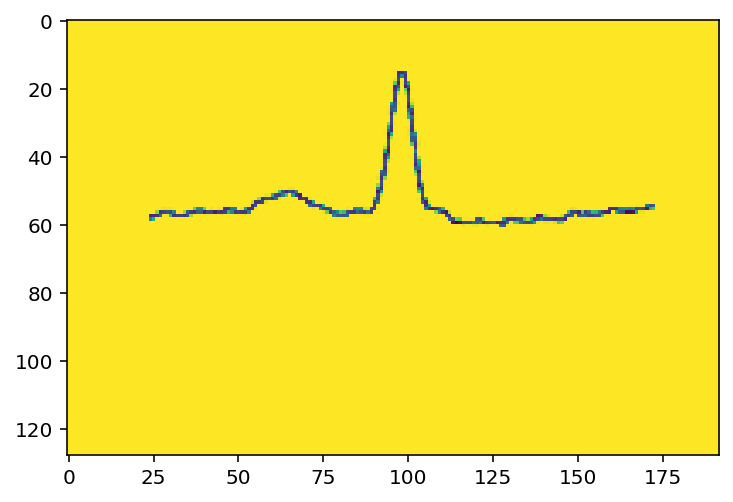

In [13]:
# Read one image with imread and plot it

image = mpimg.imread(os.path.join('../ECG_Project/MITBIH_img/N', N_imgs[0]))

plt.imshow(image)

In [14]:
print(image.shape)
print(type(image))

(128, 192)
<class 'numpy.ndarray'>


In [15]:
# Define a function which will plot several images

def image_shows(folder, save_folder_name, number_of_images):
    
    n=number_of_images;
    
    folder_list = os.listdir(folder)
    
    fig, axes = plt.subplots(nrows = 1, ncols=n, figsize=(20, 10))
    
    for i in range(n):
        
        print(os.path.join(folder, folder_list[i]))
        
        image = mpimg.imread(os.path.join(folder, folder_list[i]));
        
        axes[i].imshow(image);
    
    fig.savefig(save_folder_name)

In [16]:
os.makedirs('/Users/Murat/Desktop/ECG_Project/plots', exist_ok = True)

../ECG_Project/MITBIH_img/N/fig_72633.png
../ECG_Project/MITBIH_img/N/Lfig_2822.png
../ECG_Project/MITBIH_img/N/fig_34666.png
../ECG_Project/MITBIH_img/N/fig_53825.png
../ECG_Project/MITBIH_img/N/fig_33109.png
../ECG_Project/MITBIH_img/N/fig_15870.png


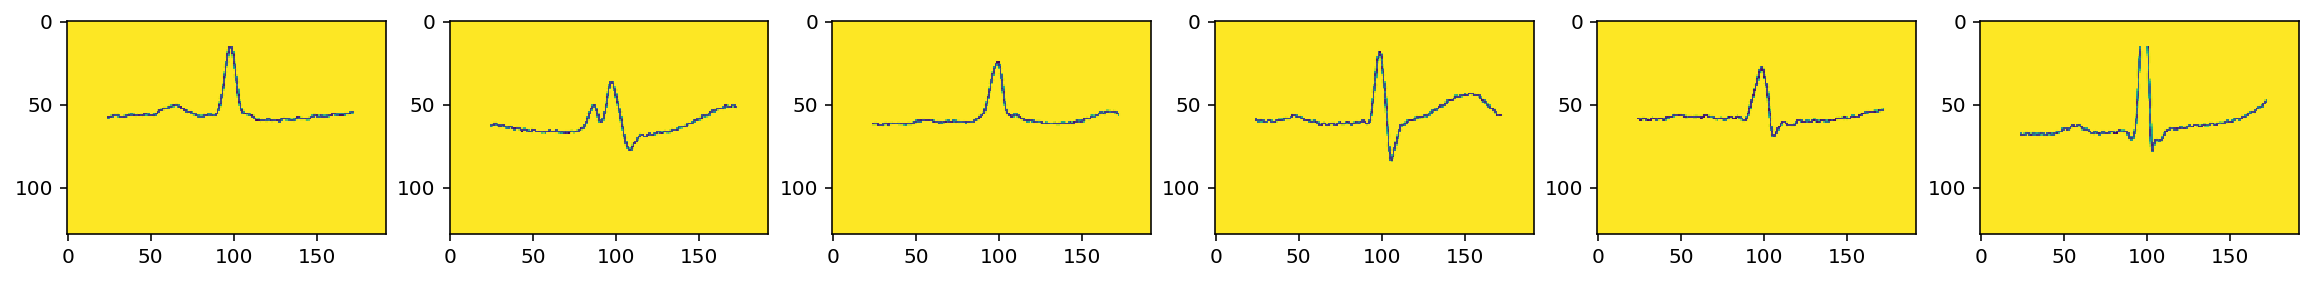

In [17]:
# Examples of N

image_shows(folder = '../ECG_Project/MITBIH_img/N', save_folder_name='../ECG_Project/plots/N.png', number_of_images = 6)

../ECG_Project/MITBIH_img/F/Ffig_572.png
../ECG_Project/MITBIH_img/F/Ffig_214.png
../ECG_Project/MITBIH_img/F/Ffig_200.png
../ECG_Project/MITBIH_img/F/Ffig_566.png
../ECG_Project/MITBIH_img/F/Ffig_228.png
../ECG_Project/MITBIH_img/F/Ffig_599.png


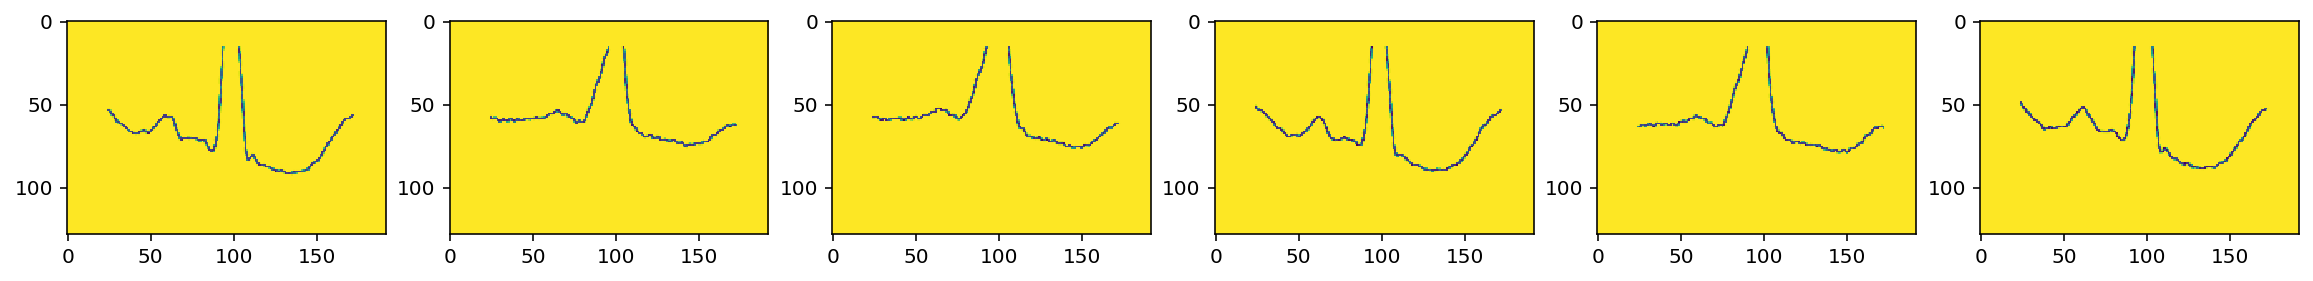

In [18]:
# Examples of F

image_shows(folder = '../ECG_Project/MITBIH_img/F', save_folder_name='../ECG_Project/plots/F.png', number_of_images = 6)

../ECG_Project/MITBIH_img/Q/pfig_31204812.png
../ECG_Project/MITBIH_img/Q/pfig_31206963.png
../ECG_Project/MITBIH_img/Q/pfig_31206977.png
../ECG_Project/MITBIH_img/Q/ffig_31200629.png
../ECG_Project/MITBIH_img/Q/pfig_31204806.png
../ECG_Project/MITBIH_img/Q/pfig_31201956.png


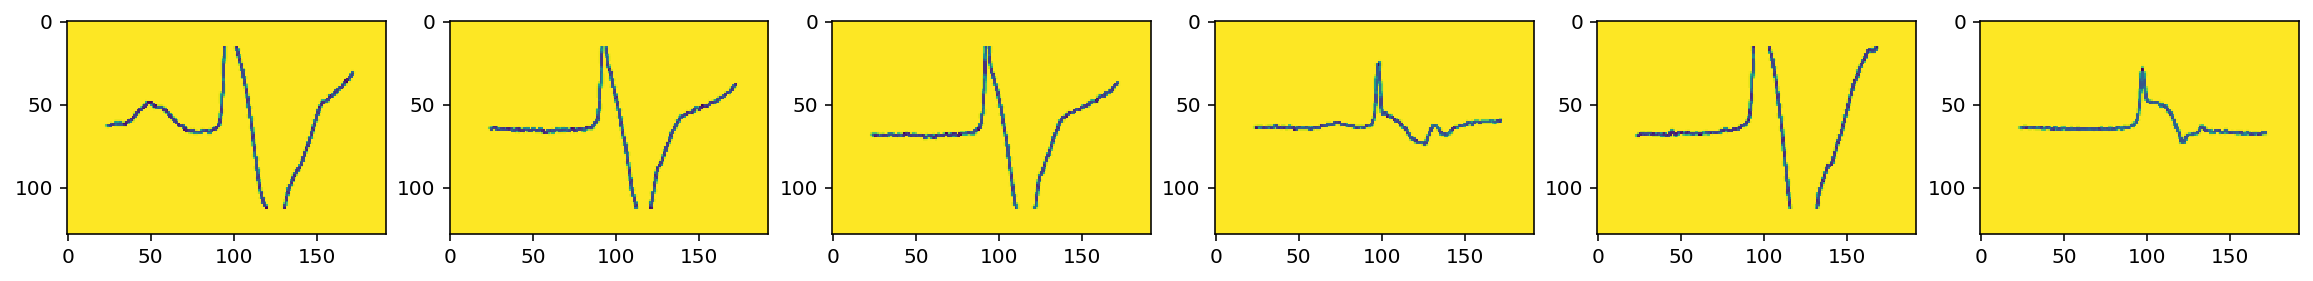

In [19]:
# Examples of Q

image_shows(folder = '../ECG_Project/MITBIH_img/Q', save_folder_name='../ECG_Project/plots/Q.png', number_of_images = 6)

../ECG_Project/MITBIH_img/S/Afig_717.png
../ECG_Project/MITBIH_img/S/Afig_703.png
../ECG_Project/MITBIH_img/S/Jfig_31200068.png
../ECG_Project/MITBIH_img/S/Jfig_31200040.png
../ECG_Project/MITBIH_img/S/Jfig_31200054.png
../ECG_Project/MITBIH_img/S/Afig_2123.png


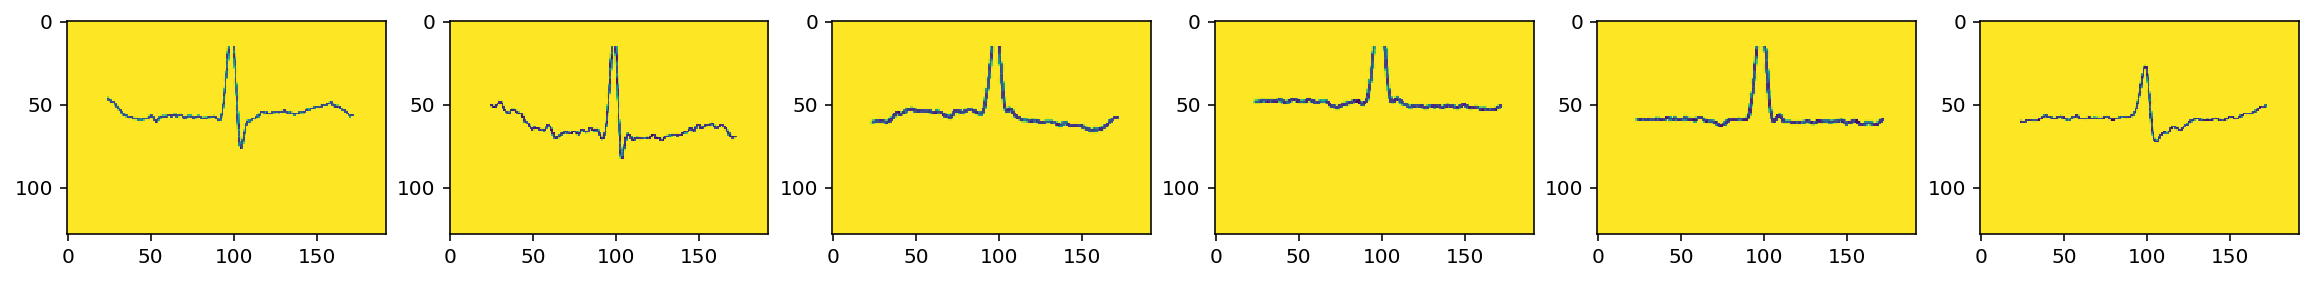

In [20]:
# Examples of S

image_shows(folder = '../ECG_Project/MITBIH_img/S', save_folder_name='../ECG_Project/plots/S.png',number_of_images = 6)

../ECG_Project/MITBIH_img/V/fig_6454.png
../ECG_Project/MITBIH_img/V/fig_2632.png
../ECG_Project/MITBIH_img/V/fig_4243.png
../ECG_Project/MITBIH_img/V/fig_4525.png
../ECG_Project/MITBIH_img/V/fig_2154.png
../ECG_Project/MITBIH_img/V/fig_6332.png


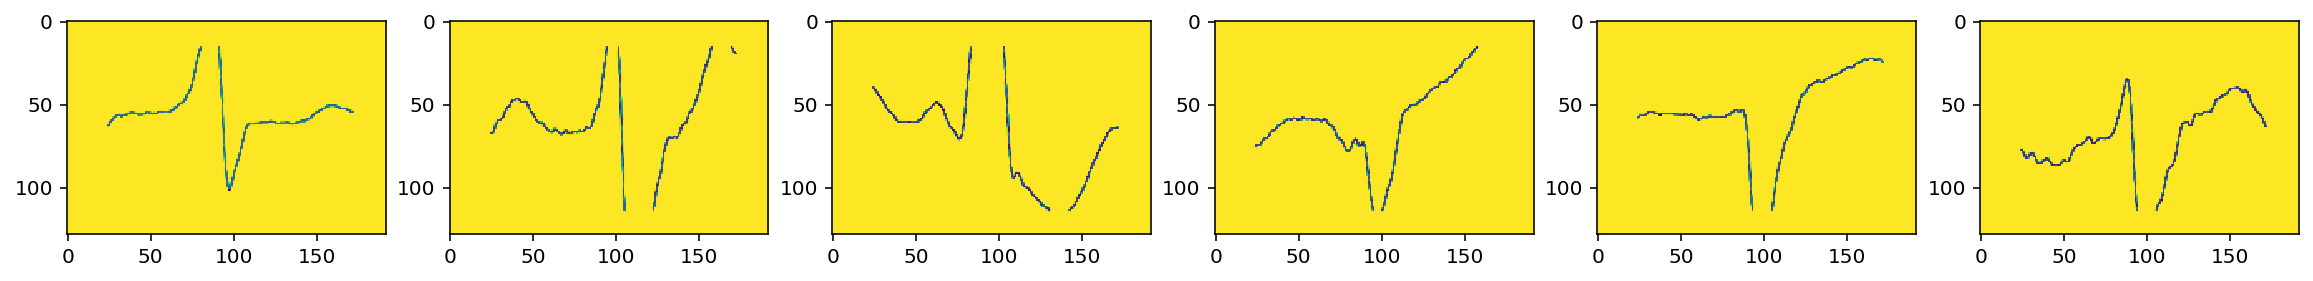

In [21]:
# Examples of V

image_shows(folder = '../ECG_Project/MITBIH_img/V', save_folder_name='../ECG_Project/plots/V.png', number_of_images = 6)

## To see 3 channels I read figures with cv 2 package

In [22]:
import cv2

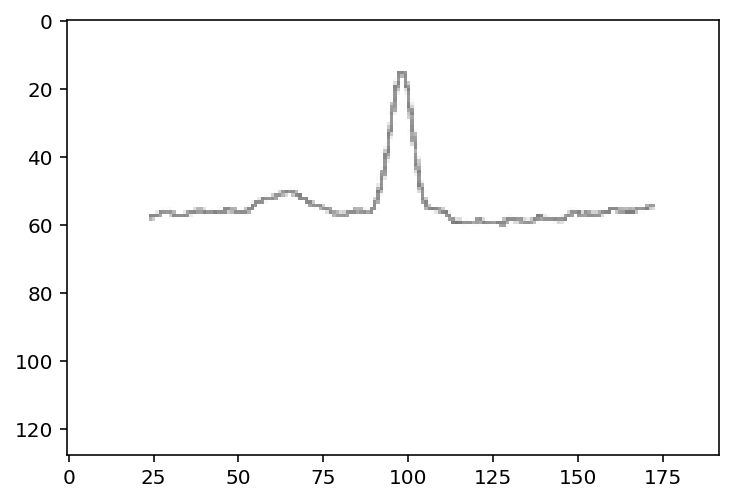

In [23]:
imgcv = cv2.imread(os.path.join('../ECG_Project/MITBIH_img/N', N_imgs[0]))
plt.imshow(imgcv)
plt.show();

In [24]:
imgcv.shape

(128, 192, 3)

In [25]:
b = imgcv.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = imgcv.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = imgcv.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

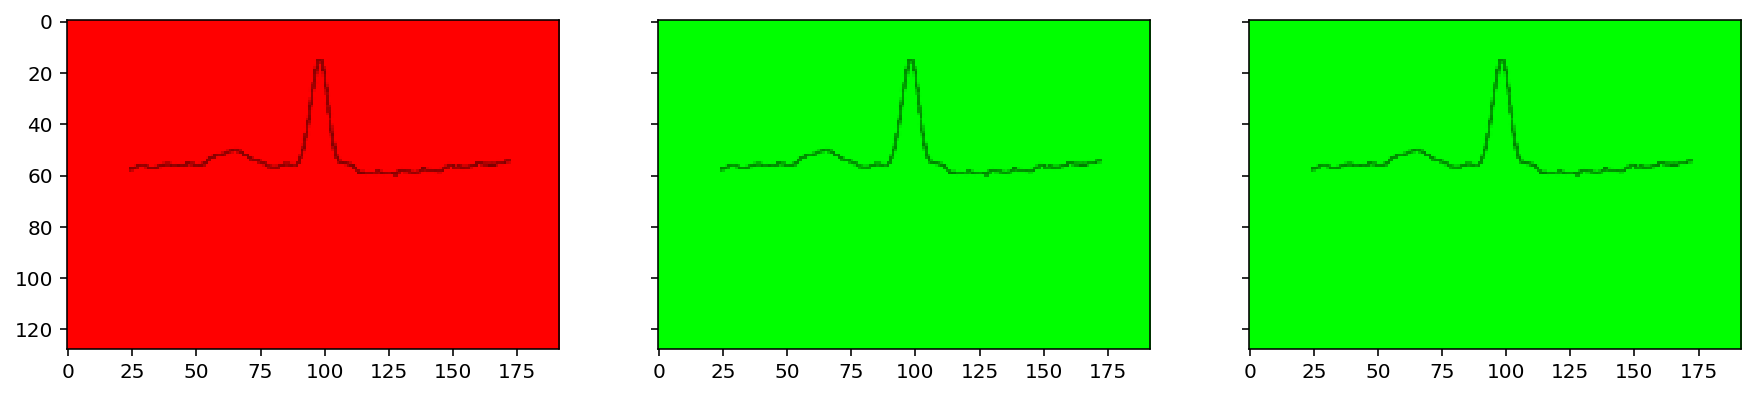

In [28]:
# plot data

fig = plt.figure(figsize=(15,15))

plot_1 = plt.subplot(131)
plot_1.imshow(b);

#plt.subplot(131).imshow(b);

plot_2 = plt.subplot(132, sharex=plot_1, sharey=plot_1)
plt.setp(plot_2.get_yticklabels(), visible=False);
plot_2.imshow(g);

plot_3 = plt.subplot(133, sharex=plot_1, sharey=plot_1)
plt.setp(plot_3.get_yticklabels(), visible=False);
plot_3.imshow(g);

fig.savefig('../ECG_Project/plots/RGB');
plt.show();

## Lets load images with datasets.ImageFolder function and than read and plot

In [29]:
# Define default PATH

TRAIN_PATH        = '../ECG_Project/MITBIH_img/'

transform         = transforms.Compose(
                                       [transforms.Resize([120,120]),
                                        transforms.Grayscale(), 
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.5), (0.5))
                                       ])
  
train_data_set    = datasets.ImageFolder(root=TRAIN_PATH, 
                                         transform=transform)

batch_size=32

train_data_loader = DataLoader(train_data_set, 
                               batch_size=batch_size, 
                               shuffle=True)

In [30]:
# Run this to test your data loader

images, labels = next(iter(train_data_loader))

In [31]:
def imshow_tensor(image, ax=None, title=None, normalize=True):
    
    """Imshow for Tensor."""
    
    if ax is None:
        fig, ax = plt.subplots()
        
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5])
        std = np.array([0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

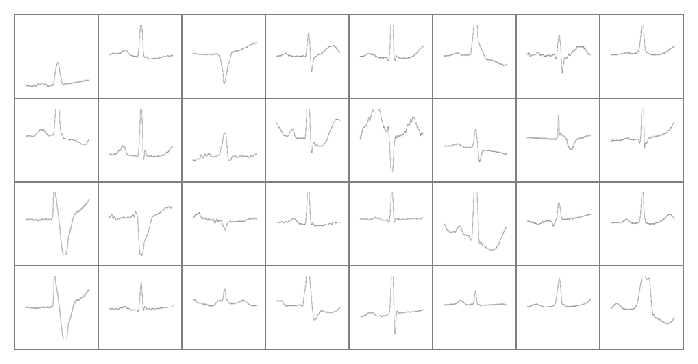

In [32]:
# show images

ncol = 8;

imshow_tensor(torchvision.utils.make_grid(images,nrow = ncol));

In [33]:
# print labels

classes = ('N', 'Q', 'F', 'S', 'V')

nrow = batch_size/ncol;

for row in range(int(nrow)):
    
    print(' '.join('%5s' % classes[labels[(row*ncol)+j]] for j in range(ncol)))  

    Q     Q     Q     Q     Q     Q     Q     Q
    Q     Q     Q     Q     V     Q     F     Q
    F     V     Q     Q     Q     N     Q     Q
    F     Q     Q     Q     Q     Q     Q     V
